In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv( "C:/Users/user/Documents/GitHub/Causal-Inference-Proyect-e---STI/DATA/processed_esti.csv" )
df

,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
0,1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
1,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
2,0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
3,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
4,1,1,1,0,0,1,0,0,0,0,0,1,0,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,0,0,0,1,0,0,0,0,0,1,0,0,0,24,8
1735,1,1,1,0,0,0,1,0,0,0,1,1,0,29,1
1736,1,1,1,0,0,0,0,0,0,1,0,1,0,27,4
1737,0,1,1,0,0,0,0,0,0,1,1,1,0,25,4


In [3]:
variables = [
    'y', 'w', 'gender_female', 'gender_male', 'gender_transgender',
    'ethnicgrp_asian', 'ethnicgrp_black', 'ethnicgrp_mixed_multiple',
    'ethnicgrp_other', 'ethnicgrp_white', 'partners1', 'postlaunch',
    'age', 'imd_decile'
]

In [4]:
control_group = df[df['w'] == 0]
treatment_group = df[df['w'] == 1]

def calculate_stats(variable):
    control_mean = control_group[variable].mean()
    control_std = control_group[variable].std()
    treatment_mean = treatment_group[variable].mean()
    treatment_std = treatment_group[variable].std()
    diff = sm.OLS(df[variable], sm.add_constant(df['w'])).fit().params[1]
    return control_mean, control_std, treatment_mean, treatment_std, diff

# Create the balance table
balance_table = pd.DataFrame(columns=['Control mean', 'Control sd', 'Treatment mean', 'Treatment sd', 'Diff'])


In [5]:
for var in variables:
    control_mean, control_std, treatment_mean, treatment_std, diff = calculate_stats(var)
    balance_table.loc[var] = [control_mean, control_std, treatment_mean, treatment_std, diff]

# Display the balance table
balance_table

,Control mean,Control sd,Treatment mean,Treatment sd,Diff
y,0.211491,0.408616,0.476656,0.499726,0.265164
w,0.000000,0.000000,1.000000,0.000000,1.000000
gender_female,0.580685,0.493749,0.587405,0.492569,0.006720
gender_male,0.418093,0.493547,0.409338,0.491979,-0.008755
gender_transgender,0.001222,0.034964,0.003257,0.057011,0.002035
ethnicgrp_asian,0.055012,0.228144,0.071661,0.258066,0.016649
ethnicgrp_black,0.092910,0.290483,0.080347,0.271978,-0.012562
ethnicgrp_mixed_multiple,0.092910,0.290483,0.084691,0.278572,-0.008219
ethnicgrp_other,0.017115,0.129779,0.009772,0.098423,-0.007343
ethnicgrp_white,0.742054,0.437772,0.753529,0.431190,0.011475


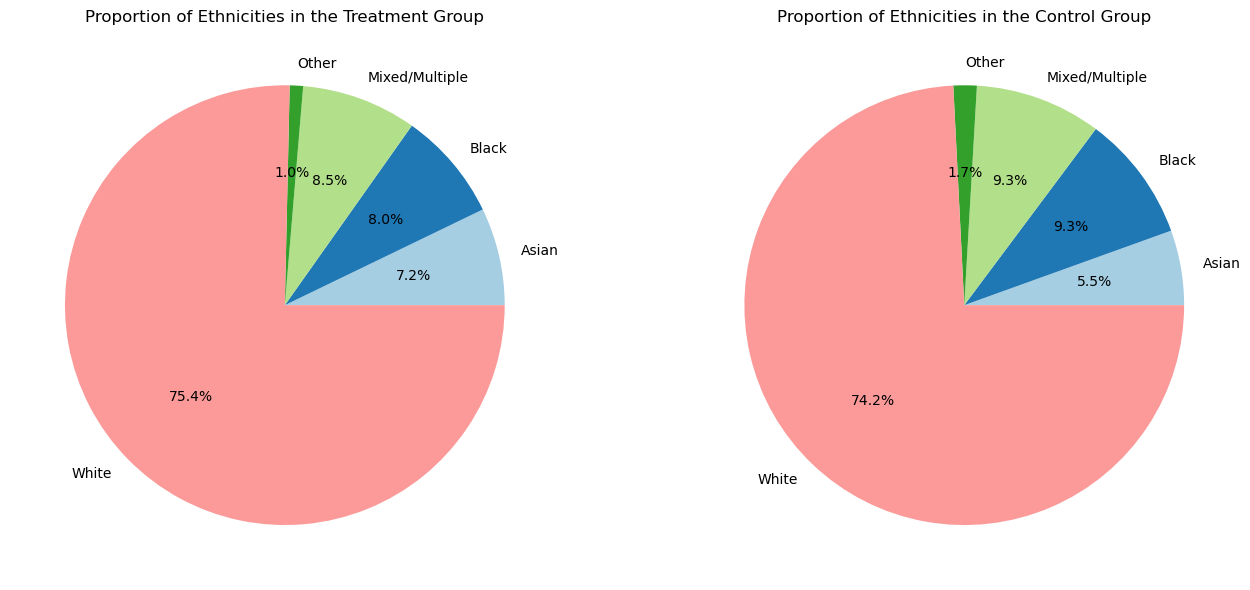

In [7]:
ethnicities = ['ethnicgrp_asian', 'ethnicgrp_black', 'ethnicgrp_mixed_multiple', 'ethnicgrp_other', 'ethnicgrp_white']

treatment_counts = treatment_group[ethnicities].sum()
treatment_proportions = treatment_counts / treatment_counts.sum()

control_counts = control_group[ethnicities].sum()
control_proportions = control_counts / control_counts.sum()

ethnicity_labels = {
    'ethnicgrp_asian': 'Asian',
    'ethnicgrp_black': 'Black',
    'ethnicgrp_mixed_multiple': 'Mixed/Multiple',
    'ethnicgrp_other': 'Other',
    'ethnicgrp_white': 'White'
}


treatment_proportions = treatment_proportions.rename(index=ethnicity_labels)
control_proportions = control_proportions.rename(index=ethnicity_labels)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
treatment_proportions.plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Proportion of Ethnicities in the Treatment Group')
plt.ylabel('')

plt.subplot(1, 2, 2)
control_proportions.plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Proportion of Ethnicities in the Control Group')
plt.ylabel('')

plt.tight_layout()
plt.show()


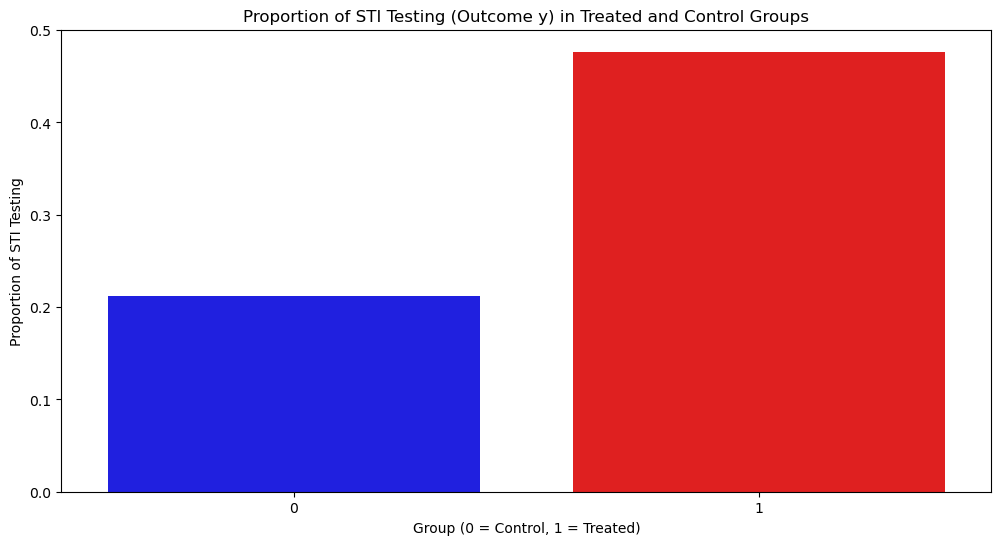

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='w', y='y', data=df, palette=['blue', 'red'], errorbar=None)
plt.title('Proportion of STI Testing (Outcome y) in Treated and Control Groups')
plt.xlabel('Group (0 = Control, 1 = Treated)')
plt.ylabel('Proportion of STI Testing')
plt.show()
